## Test the pre-trained imported model Road signs


In [2]:
# useful libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

print('Tensorflow version :', tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

%matplotlib inline

Tensorflow version : 2.4.0
Num GPUs Available:  1


### Preprocess the test set

In [3]:
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

# categorize features and labels
x_test, y_test = test['features'], test['labels']

# convert to grayscale and normalization of the test data
x_test_gray  = to_normalize(x_test)

# check the shape of the test set
x_test_gray.shape

(12630, 32, 32, 1)

### Load the pre-trained model and get a summary of the architecture

In [4]:
# load the pre-trained model
new_cnn_model = models.load_model('road-sign_model_version_SDC.h5')

# show architecture
new_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0

### Check the model accuracy viability using the test set

In [5]:
# check the accuracy of the loaded model
from sklearn.utils import shuffle
x_test_gray, y_test = shuffle(x_test_gray, y_test)

loss, acc = new_cnn_model.evaluate(x_test_gray, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

395/395 - 5s - loss: 0.3322 - acc: 0.9598
Restored model, accuracy: 95.98%


## Evaluate the pre-trained model on test set and internet data

In this section we'll test our model performance on internet data and test sets.

### Evaluating the model on the test set

In [6]:
#Printing the classification report
from sklearn.metrics import classification_report
predictions = np.argmax(new_cnn_model.predict(x_test_gray), axis=-1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.98      0.98      0.98       720
           2       0.98      0.99      0.98       750
           3       0.92      0.96      0.94       450
           4       0.98      0.99      0.98       660
           5       0.92      0.97      0.95       630
           6       0.97      0.85      0.90       150
           7       0.98      0.88      0.93       450
           8       0.91      0.96      0.94       450
           9       0.96      1.00      0.98       480
          10       1.00      0.98      0.99       660
          11       0.89      0.98      0.93       420
          12       0.98      0.99      0.98       690
          13       0.99      1.00      1.00       720
          14       0.93      0.99      0.96       270
          15       1.00      1.00      1.00       210
          16       0.99      1.00      0.99       150
          17       0.99    

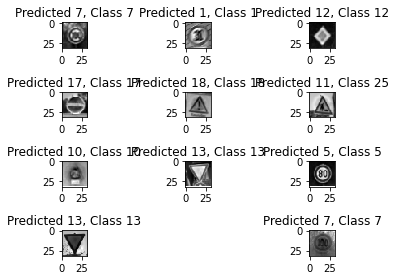

In [7]:
# show predictions on test set
img_batch = 90
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_test_gray[i+img_batch].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[i+img_batch], y_test[i+img_batch]))
    plt.tight_layout()

### Evaluating the model on real world data

We'll test our model with some real world/internet **data**

In [20]:
from PIL import Image
from importlib import reload
import utils; reload(utils)
from utils import *

# definition of the internet test directory
new_imgs_dir = "./german_road_signs/"

# get all the images in the folder and apply the preprocessing to the internet images
new_imgs = get_imgs(new_imgs_dir)

# convert the images to grayscale and check the grayscale images shape
new_imgs_grayscale = np.asarray(list(map(lambda img: to_grayscale(img), new_imgs)))
new_imgs_grayscale.shape

(15, 32, 32)

#### Create new labels corresponding to our imported images

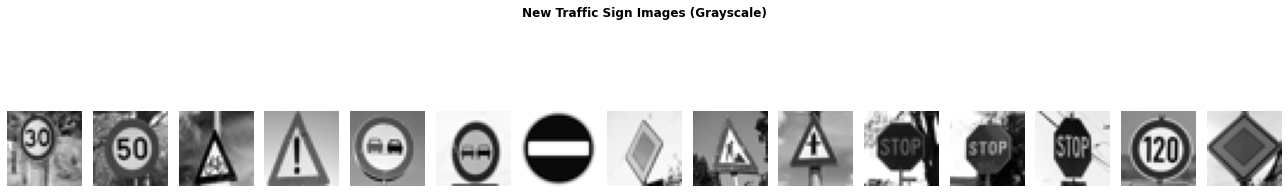

In [22]:
# Let's also create the labels for our testing images
new_img_lbs = np.array([1,2, 29, 18, 9, 9, 17, 12, 25, 11, 14, 14, 14, 8, 12])

# check the grayscale images after converting RGB to grayscale
show_imgs(new_imgs_grayscale, new_img_lbs, "New Traffic Sign Images (Grayscale)", cols=len(new_imgs_grayscale), 
                fig_size=(18,18), show_ticks=False)

In [23]:
# Convert to a format for Tensorflow inputs
new_imgs_grayscale = np.reshape(new_imgs_grayscale, (new_imgs_grayscale.shape[0], 32, 32, 1))

# check new_imgs_grayscale shape
new_imgs_grayscale.shape

(15, 32, 32, 1)

In [24]:
# check the predictions
predictions = np.argmax(new_cnn_model.predict(new_imgs_grayscale), axis=-1)
predictions

array([ 1,  2, 26, 18, 10,  9, 17, 12, 25, 18, 14, 14, 14,  8, 12],
      dtype=int64)

#### Show some predictions 

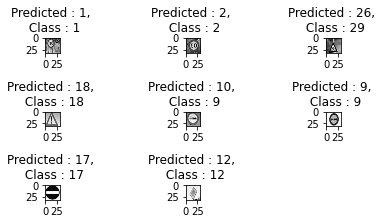

In [25]:
# by defaults
number_img = len(new_imgs)
start_number_img = 0
end_number_img = len(new_imgs)/2

# show the first seventh predictions
for i in range(start_number_img,round(end_number_img)):
  plt.subplot(4,3,i+1)
  plt.imshow(new_imgs_grayscale[i].squeeze(), cmap='gray', interpolation='none')
  plt.title("Predicted : {}, \n Class : {}".format(predictions[i], new_img_lbs[i]))
  plt.tight_layout()

In [26]:
# check the prediction accuracy by summing all the right predictions and divided by the total number of predictions
prediction_accuracy = np.sum(new_img_lbs == predictions) / len(predictions)
print("Predictional accuracy on new images: {:5.2f}%".format(prediction_accuracy * 100))

Predictional accuracy on new images: 80.00%
